In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#df = pd.read_csv('results.3d/mergegram_1_1_N=20.csv')
df = pd.read_csv('results.3d/ecc_1_1_N=100.csv')

true_distrib = df.true_distrib.unique()
alter_distrib = df.alter_distrib.unique()
values = np.zeros((len(alter_distrib), len(true_distrib)))

In [3]:
# thershold value of 2D KS statistic was taken form Justel1997 paper
# not sure if that is very correct (don't know if aour implementation of 2KS is exacely the same as in the paper)
# this funkction computes approximated tthreshold value for the data (id Dstar=None)
# and computes empirical power of the 2KS
def ks_fix_threshold(df, Dstar=None):
    if not Dstar:
        # determine ciritial value of D statistic from the data
        df_equal = df[(df.true_distrib == df.alter_distrib)]
        ks_fix = []
        for df_row_id in range(df_equal.shape[0]):
            d_values = list(map(float, df_equal.iloc[df_row_id].ks_d.replace('[','').replace(']','').split(',')))
            ks_fix.append(np.quantile(d_values, q=0.95))
        Dstar = np.mean(ks_fix)
    
    ks_fix = []
    print(f'Empirical critical value of D statistic: {Dstar}')
    for df_row_id in range(df.shape[0]):
            d_values = list(map(float, df.iloc[df_row_id].ks_d.replace('[','').replace(']','').split(',')))
            d_H0 = d_values < Dstar
            d_H0 = np.sum(d_H0)/len(d_H0)
            ks_fix.append(d_H0)
    return ks_fix

In [40]:
ks_fix = ks_fix_threshold(df)
df['ks_fix'] = ks_fix

Empirical critical value of D statistic: 0.16285545166734935


In [37]:
def plot_power_matrix(test_label='ks', exclude=[]):

    for id_td, td in enumerate(true_distrib):
        for id_ad, ad in enumerate(alter_distrib):
            idx = (df.true_distrib == td) & (df.alter_distrib == ad)
            if np.sum(idx) > 1:
                raise ValueError('Labels are not unique')
            if np.sum(idx) == 1: 
                values[id_ad, id_td] = 1-df.loc[idx][test_label]
                
    plt.rcParams['figure.figsize'] = [12, 12]
    fig, ax = plt.subplots(1,1)
    
    # compute average-power
    # exclude diagonal
    for id_td, td in enumerate(true_distrib):
        print(f'td={td} {values[id_td, id_td]}')
        values[id_td, id_td] = None
    for id_td, td in enumerate(true_distrib):
        for id_ad, ad in enumerate(alter_distrib):
            if (ad in exclude) or (td in exclude):
                values[id_ad, id_td ] = None
    
    avg_power = np.nanmean(values)
    print(avg_power)
    
    im = ax.imshow(values)
    ax.set_xticks(range(len(true_distrib)))
    ax.set_xticklabels(true_distrib, rotation = 90)
    ax.set_yticks(range(len(alter_distrib)))
    ax.set_yticklabels(alter_distrib)
    ax.set_xlabel('TRUE Distribution')
    ax.set_ylabel('ALTER Distribution')
    
    ax.set_title(f'POWER of {test_label}-test = {avg_power}')
    fig.colorbar(im)

td=N01xN01xN01 0.09466666666666679
td=T3xT3xT3 0.08133333333333337
td=T5xT5xT5 0.08666666666666678
td=T10xT10xT10 0.06533333333333335
0.4849583333333333


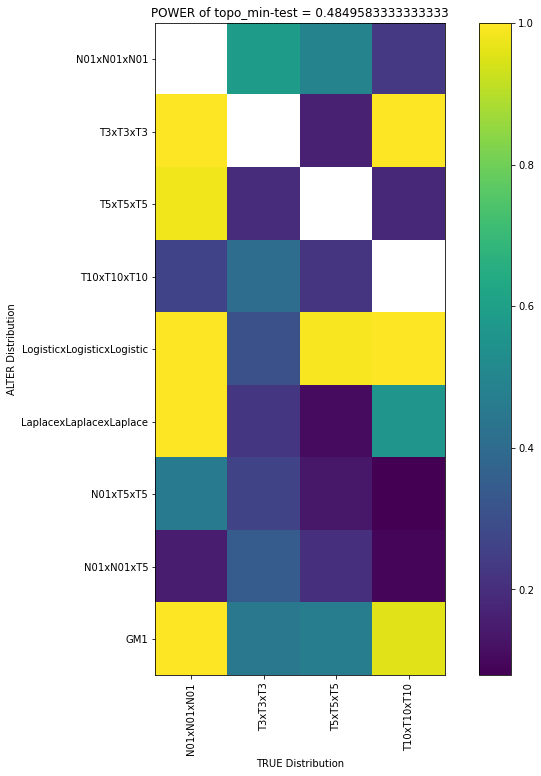

In [42]:
plot_power_matrix('topo_min')

td=N01xN01xN01 0.040000000000000036
td=T3xT3xT3 0.04800000000000004
td=T5xT5xT5 0.07599999999999996
td=T10xT10xT10 0.028000000000000025
0.34099999999999997


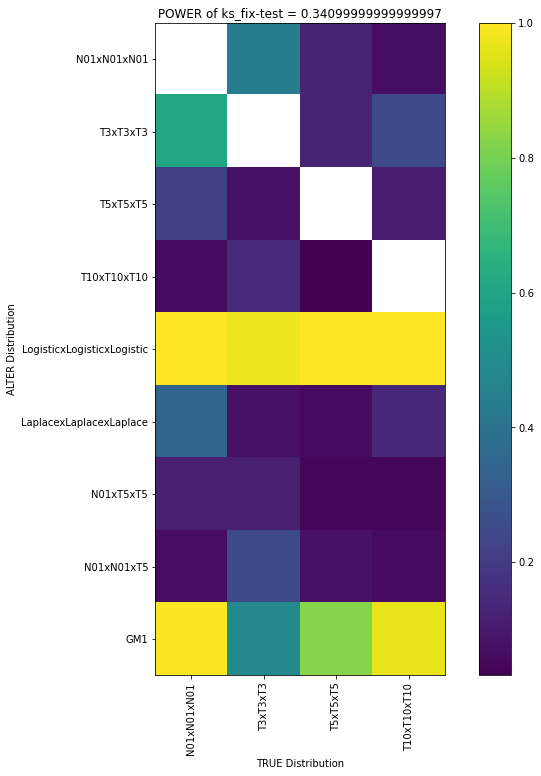

In [44]:
plot_power_matrix('ks_fix')